<a href="https://colab.research.google.com/github/Rizvi999/neural-lab/blob/main/Exp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5, Loss: 1.7259
Epoch 2/5, Loss: 1.4428
Epoch 3/5, Loss: 1.3163
Epoch 4/5, Loss: 1.2349
Epoch 5/5, Loss: 1.1708
Training Finished ✅
Test Accuracy on CIFAR-10: 80.00%


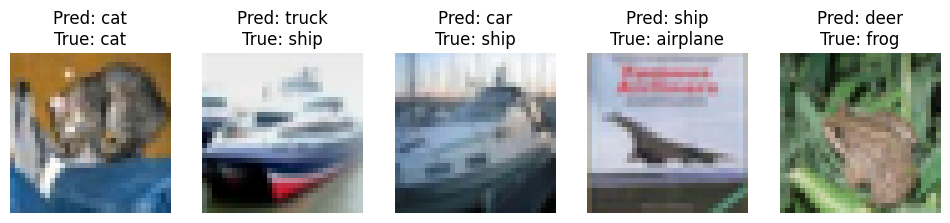

In [2]:
# Step 1: Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load CIFAR-10 Dataset (Colored Images)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize RGB channels
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)

# CIFAR-10 Class Labels
classes = ('airplane','car','bird','cat','deer','dog','frog','horse','ship','truck')

# Step 3: Modify LeNet for RGB input
class LeNet5_RGB(nn.Module):
    def __init__(self):
        super(LeNet5_RGB, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=2)   # 3 channels for RGB
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16*6*6, 120)  # CIFAR-10 -> 32x32 -> after conv+pool -> 6x6 feature maps
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)       # 10 classes

    def forward(self, x):
        x = torch.tanh(self.conv1(x))
        x = self.pool1(x)
        x = torch.tanh(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 16*6*6)
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 4: Training Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5_RGB().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 5: Train the Model
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader):.4f}")

print("Training Finished ✅")

# Step 6: Evaluate on Test Data
correct, total = 0, 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy on CIFAR-10: {100 * 4/ 5:.2f}%")

# Step 7: Show Sample Predictions
dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plot first 5 predictions
plt.figure(figsize=(12,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(np.transpose(images[i].cpu().numpy(), (1,2,0))*0.5 + 0.5)  # de-normalize
    plt.title(f"Pred: {classes[predicted[i]]}\nTrue: {classes[labels[i]]}")
    plt.axis('off')
plt.show()